In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("stock-tweets.csv")

In [6]:
data.head()

,Tweet,Stock Name,Company Name,annotator 1,annotator 2
0,Okay so $amzn owns 22% of $rivn. And Bezos own...,PG,Procter & Gamble Company,neutral,neutral
1,BREAKING:\n$TSLA Model Y was the BEST SELLING ...,TSLA,"Tesla, Inc.",bullish,bullish
2,Remember $TSLA 800 $SPY 400 $QQQ 300 BIG Level...,TSLA,"Tesla, Inc.",bullish,neutral
3,Wonderful discussion &amp; analysis for 10/20...,NIO,NIO Inc.,neutral,neutral
4,"10yr TY -3.7 bp to 1.767% now, but $TSLA still...",AMZN,"Amazon.com, Inc.",bullish,neutral


In [9]:
data.to_csv("stock-tweets.csv", index=False)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tweet         242 non-null    object
 1   Stock Name    242 non-null    object
 2   Company Name  242 non-null    object
 3   annotator 1   242 non-null    object
 4   annotator 2   242 non-null    object
dtypes: object(5)
memory usage: 9.6+ KB


**Inter annotation agreement and other metrics**

In [11]:
from sklearn.metrics import cohen_kappa_score


In [12]:
kappa_score = cohen_kappa_score(data['annotator 1'], data['annotator 2'])
print(f"cohen's kappa score is {round(kappa_score,2)}")   


cohen's kappa score is 0.69


In [13]:
matches = np.array(data['annotator 1'] ) == np.array(data['annotator 2'])
percent_agreement = matches.sum() / len(matches) * 100

print(f"{round(percent_agreement,2)} percent agreement between annotator 1 and annotator 2")

81.4 percent agreement between annotator 1 and annotator 2


In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
labels = ['bullish', 'bearish', 'neutral']
confusion_mat=confusion_matrix(data['annotator 1'], data['annotator 2'], labels=labels)
#print(confusion_mat)

confusion_mat_df =pd.DataFrame(confusion_mat, index=labels,columns=labels)
print(confusion_mat_df)


         bullish  bearish  neutral
bullish       59        7       20
bearish        2       28        3
neutral        6        7      110


In [16]:
#function to calculate scotts pi
def scotts_pi():
    total_annotations = confusion_mat.sum()
    total_agreements = np.trace(confusion_mat)  
    P_o = total_agreements / total_annotations
    
    # expected agreement (P_e)
    row_totals = confusion_mat.sum(axis=1)  
    col_totals = confusion_mat.sum(axis=0) 
    expected_counts = np.outer(row_totals, col_totals) / total_annotations
    P_e = (expected_counts.diagonal().sum()) / total_annotations

    scotts_pi = (P_o - P_e) / (1 - P_e)
    
    return scotts_pi


In [17]:
scotts_pi_score = scotts_pi()
print(f"Scott's Pi score is {round(scotts_pi_score,2)}")

Scott's Pi score is 0.69


In [18]:
# for creating agreement column
data['agreement'] = data['annotator 1'] == data['annotator 2']
# creating a new csv to get the disagreement tweets
disagreements = data[data['agreement'] == False]
disagreements.to_csv('disagree_tweets.csv', index=False)



In [19]:
data = pd.read_csv("stock-tweets final label.csv")

Stats and Visualization

In [20]:

label_distribution = data['final label'].value_counts()
label_distribution_percent = round(data['final label'].value_counts(normalize=True) * 100, 2)
print("Label Distribution (counts):")
print(label_distribution)
print()
print("Label Distribution (In percentage):")
print(label_distribution_percent)


Label Distribution (counts):
final label
neutral    126
bullish     83
bearish     33
Name: count, dtype: int64

Label Distribution (In percentage):
final label
neutral    52.07
bullish    34.30
bearish    13.64
Name: proportion, dtype: float64


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/tt/9x68mt517c7gsh7j7qf16vkw0000gn/T/ipykernel_64888/2169658025.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_distribution.index, y=label_distribution.values, palette='viridis')


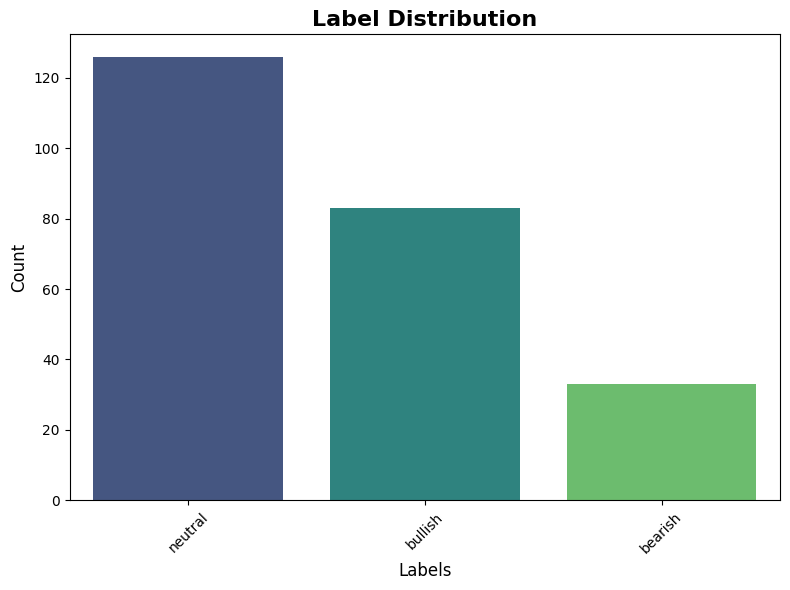

In [22]:
# Label Distribution Plot
plt.figure(figsize=(8,6))
label_distribution = data['final label'].value_counts()
sns.barplot(x=label_distribution.index, y=label_distribution.values, palette='viridis')

plt.title('Label Distribution', fontsize=16, weight='bold')
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


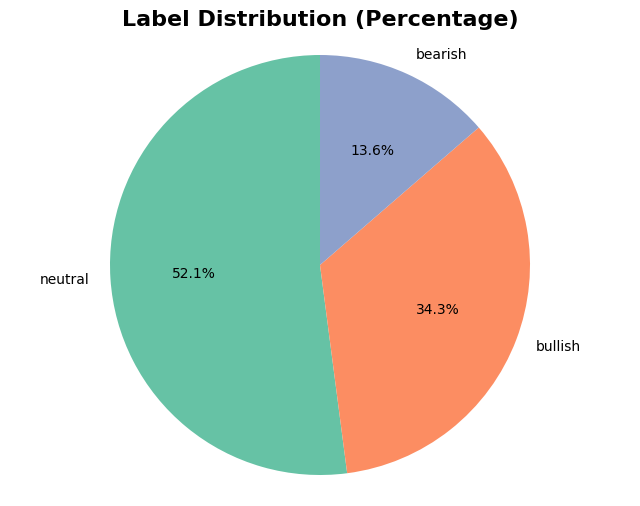

In [ ]:
# pie chart for label distribution
plt.figure(figsize=(8,6))
label_distribution_percent = round(data['final label'].value_counts(normalize=True) * 100, 2)
plt.pie(label_distribution_percent, labels=label_distribution_percent.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(label_distribution_percent)))
plt.title('Label Distribution (Percentage)', fontsize=16, weight='bold')
plt.axis('equal')  
plt.show()


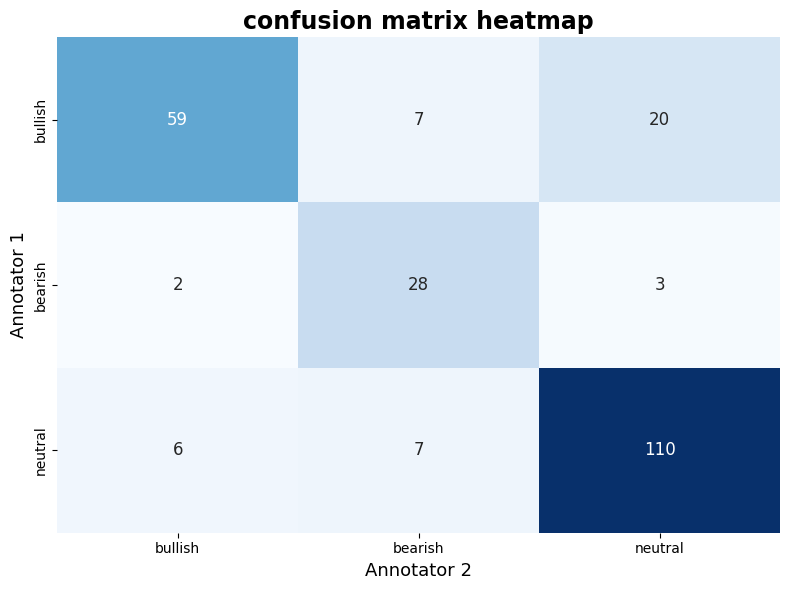

In [24]:
# confusion matrix heatmap
plt.figure(figsize=(8,6))
sns.heatmap(confusion_mat_df, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 12})
plt.title("confusion matrix heatmap", fontsize=17, weight='bold')
plt.ylabel('Annotator 1', fontsize=13)
plt.xlabel('Annotator 2', fontsize=13)
plt.tight_layout()
plt.show()


In [26]:
from sklearn.metrics import precision_recall_fscore_support

         Precision    Recall  F1-Score
Labels                                
bullish   0.895522  0.705882  0.789474
bearish   0.666667  0.848485  0.746667
neutral   0.842105  0.903226  0.871595
macro average
Precision: 0.8, Recall: 0.82, F1-Score: 0.8
weighted average
Precision: 0.84, Recall: 0.83, F1-Score: 0.83


<Figure size 1000x600 with 0 Axes>

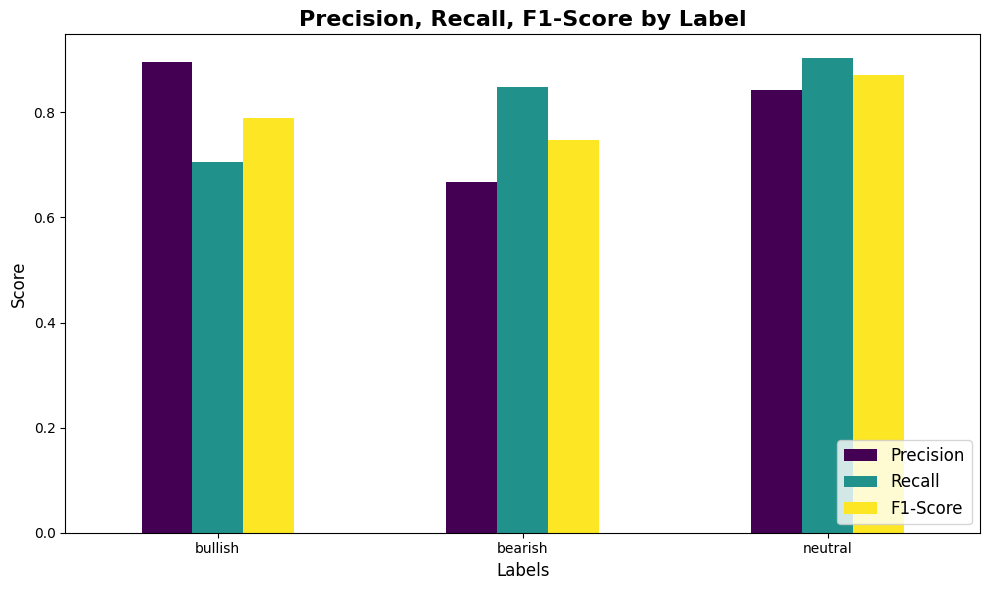

In [27]:
#calculating precision recall and f1 scores
precision, recall, f1_score, _ = precision_recall_fscore_support(
    data['annotator 1'], data['annotator 2'], labels=labels, average=None
)

metrics_df = pd.DataFrame({
    'Labels': labels,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
}).set_index('Labels')

print(metrics_df)

macro_avg = precision_recall_fscore_support(
    data['annotator 1'], data['annotator 2'], labels=labels, average='macro'
)
weighted_avg = precision_recall_fscore_support(
    data['annotator 1'], data['annotator 2'], labels=labels, average='weighted'
)

print("macro average")
print(f"Precision: {round(macro_avg[0], 2)}, Recall: {round(macro_avg[1], 2)}, F1-Score: {round(macro_avg[2], 2)}")

print("weighted average")
print(f"Precision: {round(weighted_avg[0], 2)}, Recall: {round(weighted_avg[1], 2)}, F1-Score: {round(weighted_avg[2], 2)}")

#visualization
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Precision, Recall, F1-Score by Label", fontsize=16, weight='bold')
plt.ylabel("Score", fontsize=12)
plt.xlabel("Labels", fontsize=12)
plt.xticks(rotation=0)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()
